# Diagrama de fase del comportamiento de $\nu$ en función de $N$ para diferentes $\alpha$

Dado que la ecuación maestra reproduce de manera satisfactoria la distribución de probabilidad discreta en el estado estacionario $P_n$, que resulta de una larga evolución del sistema, haremos un análisis utilizando la ecuación maestra. En particular nos perderemos de mucha estadística que no está presente en el estado estacionario, pero nos permitirá obtener relaciones entre parámetros de interés.

## Dependencia de $P_0$ en función de $\nu$

Es de interés el valor de $P_0$ en el estado estacionario dado que es la probabilidad de que, dado que se observa el sistema, la población esté extinta. Dicho valor es el primer elemento del vector normalizado del núcleo de la matriz $\overline{\overline{M}}$ definida como

$$M_{i, j} = -\left[ -\alpha (N-i) + \nu i \frac{N-i}{N-1} \mu i \right]\delta_{i, j} + \left[ \alpha (N-i+1) + \nu (i-1)\frac{N-i+1}{N-1} \right] \delta_{i, j+1} + \mu (i+1) \delta_{i, j-1},$$

tal como se definió en el archivo `2-MasterEquation.ipynb`. En la librería `MasterEquation` ubicada en el directorio `librerías\MasterEquation.py` se encuentra implementada dicha diagonalización para hallar el espacio nulo y en particular $P_0(\nu)$ 

### Código

In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
from librerias.masterEquation import MasterEquation
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [47]:
# Parameters
N = 20
mu = 1
alpha = 0.01

# nus values
nus = np.linspace(0.2, 4, 1000)

# P0 values
P0s = np.zeros(len(nus))

In [48]:
me = MasterEquation(N)
for i, nu in enumerate(tqdm(nus)):
    me.set_parameters(mu, nu, alpha)
    me.set_matrix()
    me.get_nullSpace()
    P0s[i] = me.P0    

100%|██████████| 1000/1000 [00:00<00:00, 3825.58it/s]


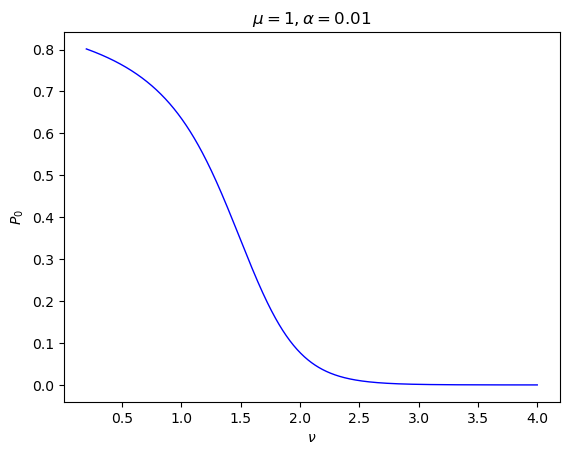

In [49]:
# plot

plt.plot(nus, P0s, color = "blue", lw=1)
plt.xlabel(r"$\nu$")
plt.ylabel(r"$P_0$")
plt.title(r"$\mu = 1, \alpha = 0.01$")

plt.show()
